# EX-1

### Euler and Hamilton path of original and line graph..

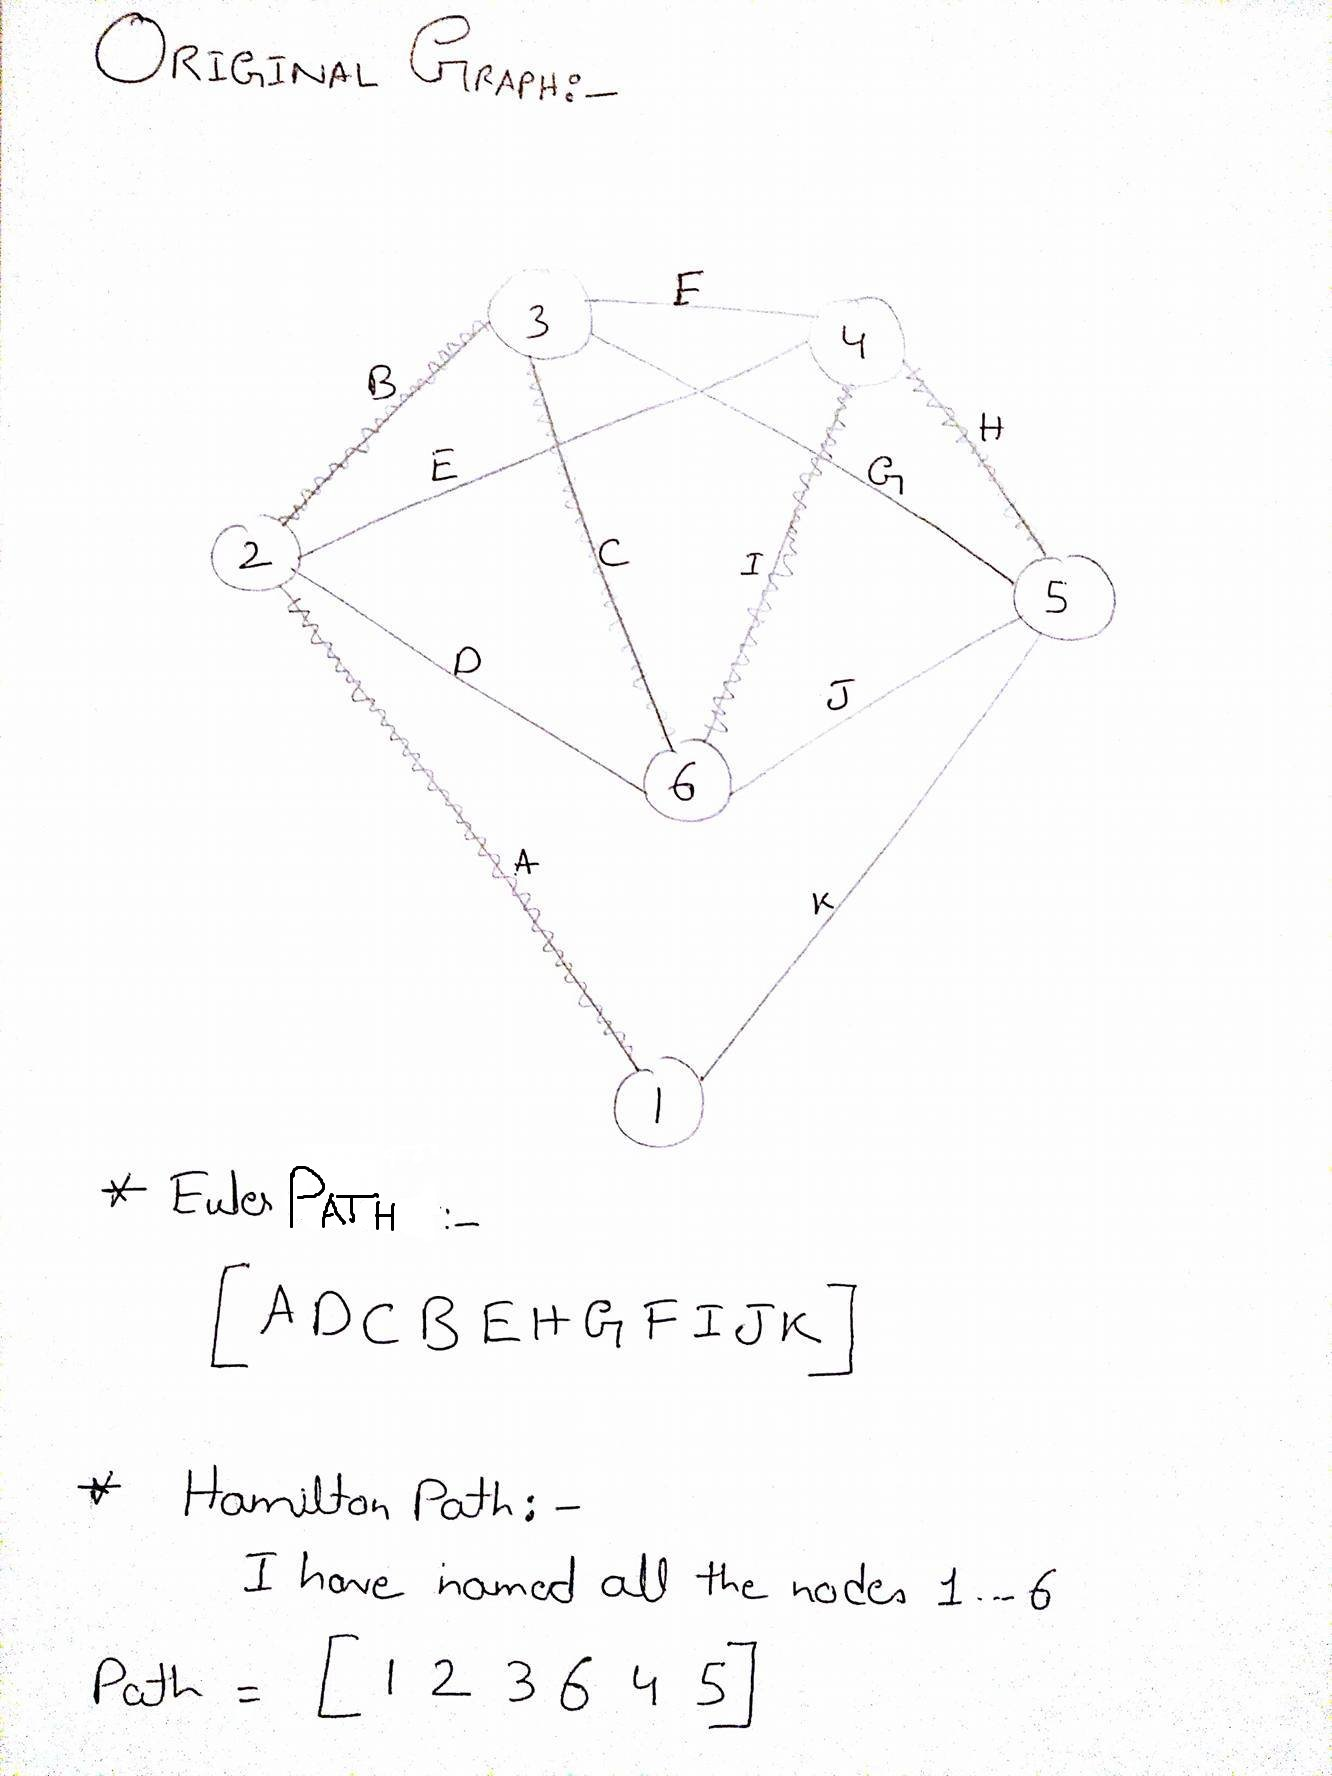

In [7]:
from IPython.display import Image
Image(filename='original.jpg')


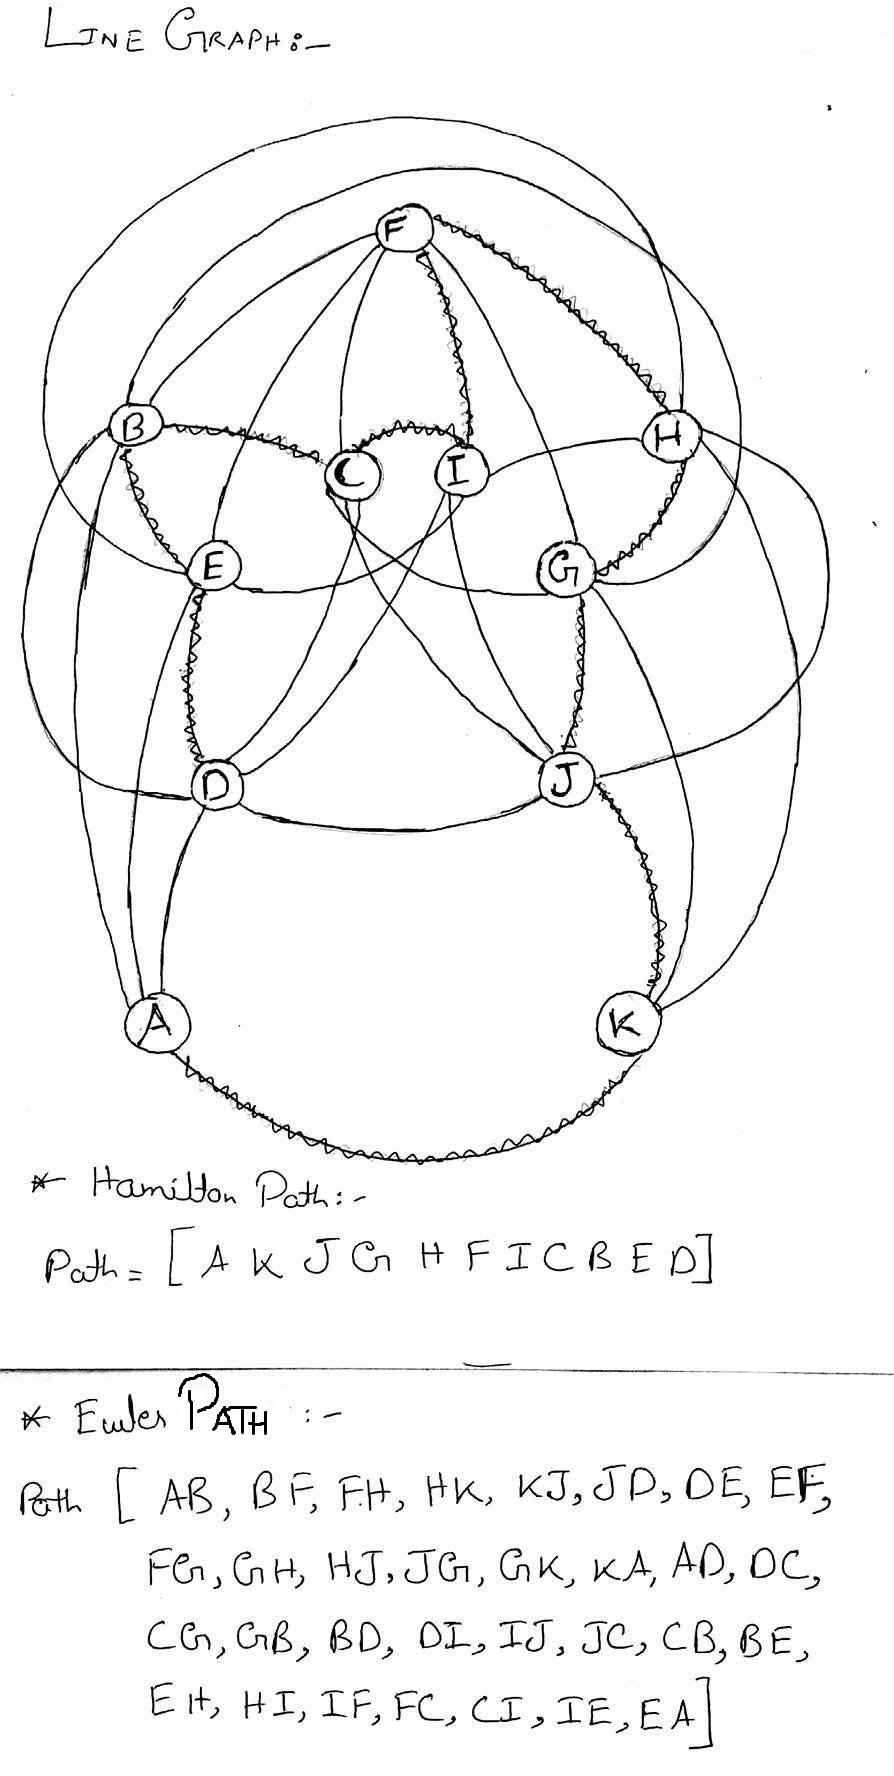

In [6]:
from IPython.display import Image
Image(filename='line.jpg')

### Description:

Definition: The Euler path in graph is the path in which we visit every edge exactly once, and hamilton path is a path in which we visit every node exactly once.

We can see that the line graph kinda follows the symmetry of the original graph. To relate the hamilton and euler path graph of both graphs what I understood is that if original graph is densed then the line graph will be quite more denser than the original graph thus the euler path of L(G) is directly proportional to the density of the original graph.

# EX-2

### Depth First Search

In [6]:

timecount = 0

class Unweighted_Graph:
    
    d_dictionary ={}
    
    def __init__(self,filename):
        self.__get_graph(filename)
        #print(self.d_dictionary)
        
    
    def __get_graph(self,filename):
        
        with open(filename) as f:
            for word in f.readlines():
                self.d_dictionary.setdefault(word.split()[0], set()).update(word.split()[1])
                self.d_dictionary.setdefault(word.split()[1], set()).update(word.split()[0])

    
    



def Depth_First(graph, node, order, timestamping):
    
    # Recursion base case..
    if node not in order:
        
        global timecount
        timecount += 1
        order.append(node)
        timestamping.setdefault(node, []).append(timecount)
        #print(timestamping)
        # Sort Graph Alphabetical order..
        for n in sorted(graph[node]):
            Depth_First(graph, n, order, timestamping)

            
        if graph[node].issubset(order):
            timecount += 1
            timestamping.setdefault(node, []).append(timecount)

    return timestamping, order


g= Unweighted_Graph("graph.20.800.txt")

#print(g.d_dictionary)
corresponding_Time, Order = Depth_First(g.d_dictionary, 'A', [], {})

print("----------------< Depth First Search >---------------\n\n")
for node in Order:
    for curr_node, current_value in corresponding_Time.items():
        if node == curr_node:
            print("\t\t  ",curr_node, ": ", current_value[0],"/", current_value[1])


----------------< Depth First Search >---------------


		   A :  1 / 40
		   F :  2 / 39
		   L :  3 / 38
		   P :  4 / 37
		   R :  5 / 36
		   E :  6 / 35
		   G :  7 / 8
		   J :  9 / 34
		   C :  10 / 33
		   D :  11 / 32
		   M :  12 / 31
		   N :  13 / 30
		   B :  14 / 29
		   H :  15 / 28
		   I :  16 / 17
		   O :  18 / 27
		   Q :  19 / 26
		   K :  20 / 23
		   S :  21 / 22
		   T :  24 / 25


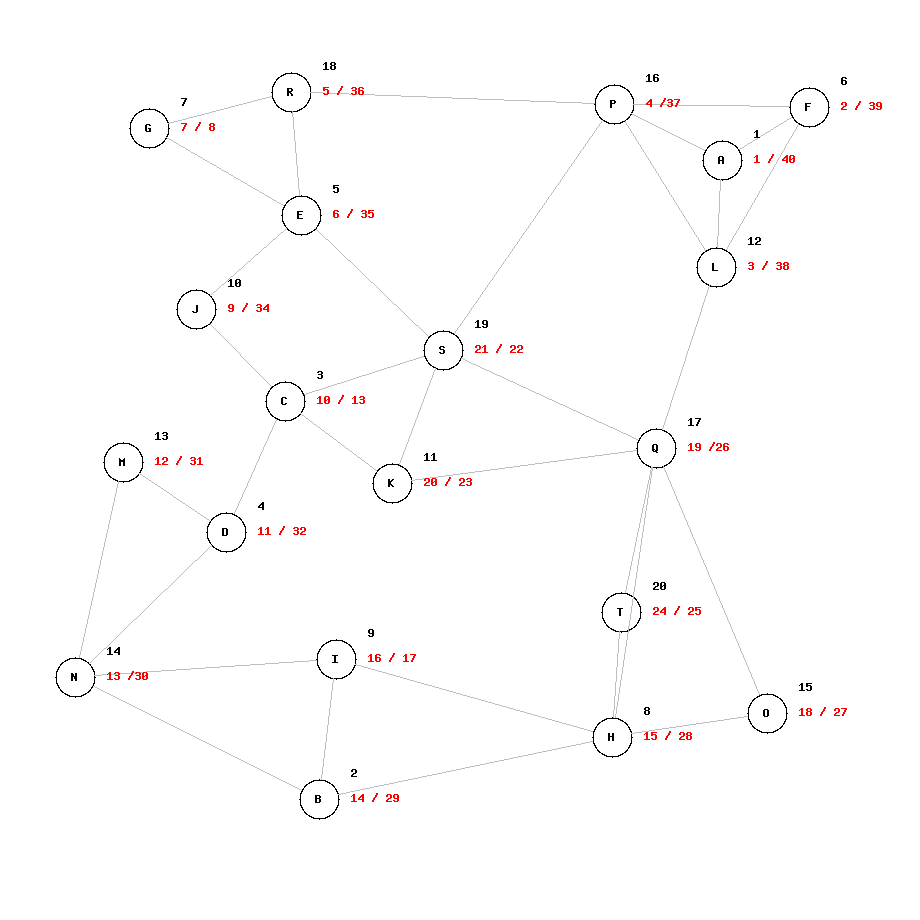

In [80]:
from IPython.display import Image
Image(filename='dfs_visual.png')

### Description:

The general idea behind the Depth First search algorithm implemented above is to start from a node in graph see all of its adjacent neighbours and choose the alphabetically ordered next node i.e open that node and do the same step which is done previously untill you reach a node whose adjacent neighbours are already in the opened node and there is nothing further to proceed.

So, that specific node on which we are currently on is considered as finished node or the node that has been processed or in other words we close the node and move back to the previous predecessor node and open the other node according to the alphabetical order and repeat the process.
The process is continued until all the nodes are closed. The timestamp here means the step at which the operation was started or node was openned and step at which the node was closed.

# EX-3

## Dijkstra Algorithm

#### Code Reference: https://gist.github.com/57uff3r/99b4064cbbcbf6a73963

In [3]:
from collections import defaultdict, deque


class Weighted_Graph(object):
    
    def __init__(self):
        self.nodes = set()# Set of nodes
        
        self.edges = defaultdict(list)
        self.distances = {}
        self.graph = [] 
        self.vertices=[]

    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance
        self.graph.append((from_node,to_node,float(distance)))
    
    


def dijkstra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = set(graph.nodes)

    while nodes:
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node
        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in graph.edges[min_node]:
            try:
                weight = current_weight + graph.distances[(min_node, edge)]
            except:
                continue
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path


def shortest_path(graph, origin, destination):
    visited, paths = dijkstra(graph, origin)
    #print(visited)
    full_path = deque()
    _destination = paths[destination]

    while _destination != origin:
        full_path.appendleft(_destination)
        _destination = paths[_destination]

    full_path.appendleft(origin)
    full_path.append(destination)

    return visited[destination], list(full_path)


graph = Weighted_Graph()

d_dictionary={}
with open('graph.20.800.txt') as f:
    for word in f.readlines():
        row = word.split()
        #print(row)
        graph.add_edge(row[0],row[1],float(row[3]))
        #graph.add_edge(row[1],row[0],float(row[3]))
        if(row[0] not in graph.nodes):
            graph.nodes.update(row[0])
            graph.vertices.append(row[0])
#             print(row[0])
        
        if(row[1] not in graph.nodes):
            graph.nodes.update(row[1])
            graph.vertices.append(row[1])
#             print(row[1])
        

#
print("\n---------------< Dijkstra In Action >----------------\n\n")
print("All shortest Paths from 'A'\n")

for node in graph.nodes:
    if(node is not 'A'):
        distance,path = shortest_path(graph, 'A', node)
        print("=> Distance : \t", distance," Path : ",path)




---------------< Dijkstra In Action >----------------


All shortest Paths from 'A'

=> Distance : 	 121.655250605964  Path :  ['A', 'P']
=> Distance : 	 568.283918503838  Path :  ['A', 'P', 'R', 'E']
=> Distance : 	 855.4854590618129  Path :  ['A', 'P', 'S', 'C', 'D', 'M']
=> Distance : 	 889.671886284512  Path :  ['A', 'L', 'Q', 'H', 'B']
=> Distance : 	 101.87246929372  Path :  ['A', 'F']
=> Distance : 	 563.692947905839  Path :  ['A', 'P', 'S', 'K']
=> Distance : 	 709.212978672421  Path :  ['A', 'P', 'R', 'E', 'J']
=> Distance : 	 591.370404575657  Path :  ['A', 'P', 'R', 'G']
=> Distance : 	 107.168092266308  Path :  ['A', 'L']
=> Distance : 	 940.2969260092829  Path :  ['A', 'P', 'S', 'C', 'D', 'N']
=> Distance : 	 421.249976861284  Path :  ['A', 'P', 'S']
=> Distance : 	 876.9940317001419  Path :  ['A', 'L', 'Q', 'H', 'I']
=> Distance : 	 587.277083081925  Path :  ['A', 'P', 'S', 'C']
=> Distance : 	 730.9503234574379  Path :  ['A', 'P', 'S', 'C', 'D']
=> Distance : 	 590.1839

### Description:

In the above implementation. The shortest_path method takes graph, intial node and the target node. The Dijkstra algorithm basically starts from the initial node. Set the distance to itself as 0 and the proceeds with other adjacent neighbours. Now Dijkstra takes every neighbour and assigns the weight to every neighbour node equal to the weight of the edge between the predecessor node and the corresponding node.

After all the neighbours are visited and assigned a distance value. One of the neighbours is choosen to process and the distances to all of its neighbours are calculated But here is the tricky part. You check if the that neighbour which are assigning a weight does it already have a weight assigned previously? If yes then you add the edge distance and the predecessor weigh value and check if this value is less than to that particular vertex weight. If yes then the weigh of that vertex is updated with new less distance.

The whole process keeps going until we reach the target node and the list of visited nodes is returned as the shortest path. Finally in the last loop all the shortest path to Origin 'A' are calculated and shown.


# EX-4

## Minimum Spanning Tree

### Code Reference: https://programmingpraxis.com/2010/04/09/minimum-spanning-tree-prims-algorithm/

In [15]:
from collections import defaultdict
from heapq import *
 
def prim( nodes, edges,start_node):
    conn = defaultdict( list )
    for n1,n2,c in edges:
        conn[ n1 ].append( (c, n1, n2) )
        conn[ n2 ].append( (c, n2, n1) )
 
    mst = []
    i = nodes.index(start_node)
    temp = nodes[0]
    nodes[0]=start_node
    nodes[i]=temp
    used = set( [nodes[ 0 ]] )
#     print(used)
    usable_edges = conn[ nodes[0] ][:]
    heapify( usable_edges )
 
    while usable_edges:
        cost, n1, n2 = heappop( usable_edges )
        if n2 not in used:
            used.add( n2 )
            mst.append( ( n1, n2, cost ) )
 
            for e in conn[ n2 ]:
                if e[ 2 ] not in used:
                    heappush( usable_edges, e )
    return mst

# prim
print("\n---------------< MST In Action >----------------\n\n")

weight_sum =0

print("Started from node : 'A'\n")
for node in prim( graph.vertices, graph.graph,'A' ):
    print("=> Distance : \t",node[2], "     Edge : ","['",node[1],"']-----", "['",node[0],"']")
    weight_sum+=node[2]
    
print("\n\n Weight Sum = ",weight_sum)


print("\n------------------------------------------------------")

weight_sum =0

print("Started from node : 'K'\n")
for node in prim( graph.vertices, graph.graph,'K' ):
    print("=> Distance : \t",node[2], "     Edge : ","['",node[1],"']-----", "['",node[0],"']")
    weight_sum+=node[2]
    
print("\n\n Weight Sum = ",weight_sum)



---------------< MST In Action >----------------


Started from node : 'A'

=> Distance : 	 101.87246929372      Edge :  [' F ']----- [' A ']
=> Distance : 	 107.168092266308      Edge :  [' L ']----- [' A ']
=> Distance : 	 121.655250605964      Edge :  [' P ']----- [' A ']
=> Distance : 	 190.685605120051      Edge :  [' Q ']----- [' L ']
=> Distance : 	 167.693172192549      Edge :  [' T ']----- [' Q ']
=> Distance : 	 125.323581180878      Edge :  [' H ']----- [' T ']
=> Distance : 	 156.84705926475      Edge :  [' O ']----- [' H ']
=> Distance : 	 234.463216731324      Edge :  [' S ']----- [' Q ']
=> Distance : 	 142.442971044555      Edge :  [' K ']----- [' S ']
=> Distance : 	 134.807269833641      Edge :  [' C ']----- [' K ']
=> Distance : 	 128.003906190397      Edge :  [' J ']----- [' C ']
=> Distance : 	 140.929060168583      Edge :  [' E ']----- [' J ']
=> Distance : 	 123.405834546021      Edge :  [' R ']----- [' E ']
=> Distance : 	 143.673240375513      Edge :  [' D ']-

### Description:

The Minimum spanning tree is a type of spanning tree on a graph in which all the nodes are connected and there is no cycle, In addition to that the sum of weights of the tree must the minimum of all types of spanning trees.
In the above implementation we start from the initial node in our case we choose 'A' but you can also choose any other initial node.

We add the first node in the visited list:
Now check all the edges with A's adjacent neighbours and take the minimum of all edge. Now that particular edge leads to another node that means we add that node in visited node. Now we have to see from all of the adjacent neighbours of all nodes in the visited list and choose the minimum of all edges. 

Repeat the process until every node is visited and we will get the minimum spanning tree. The above implementation uses min heap to find minimum of all.

### Visualization MST of Above Graph Starting from 'A'

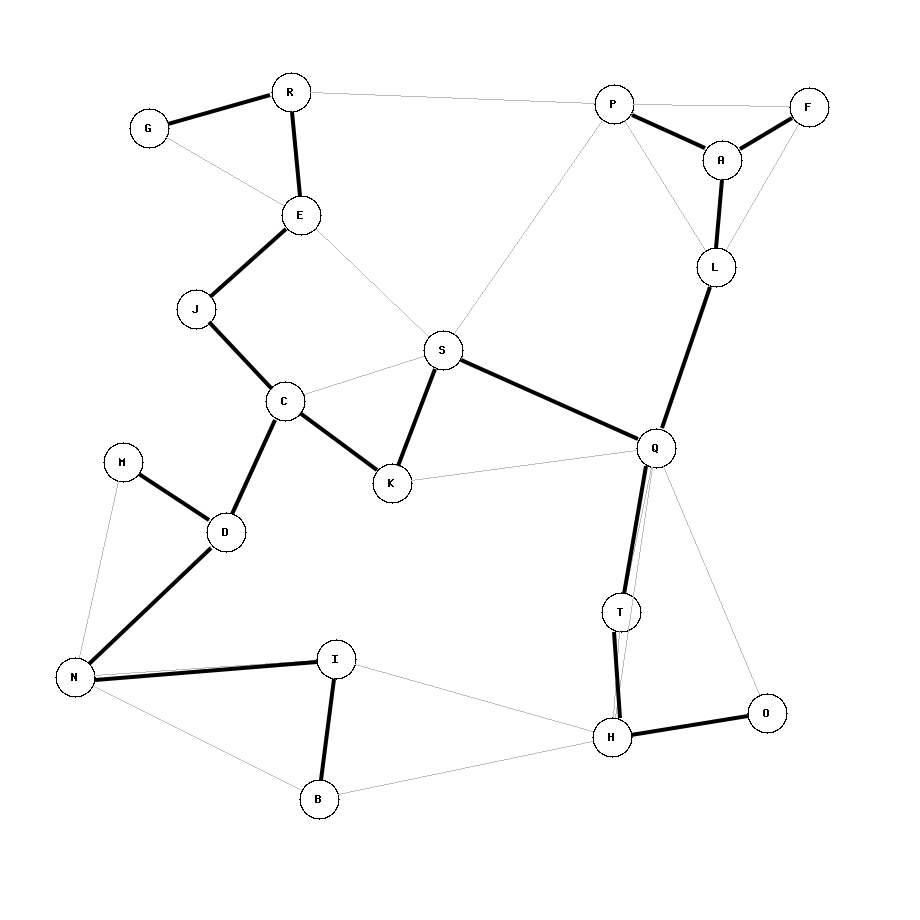

In [234]:
from IPython.display import Image
Image(filename='MST.png')

# EX-5

## Strongly Connected Components

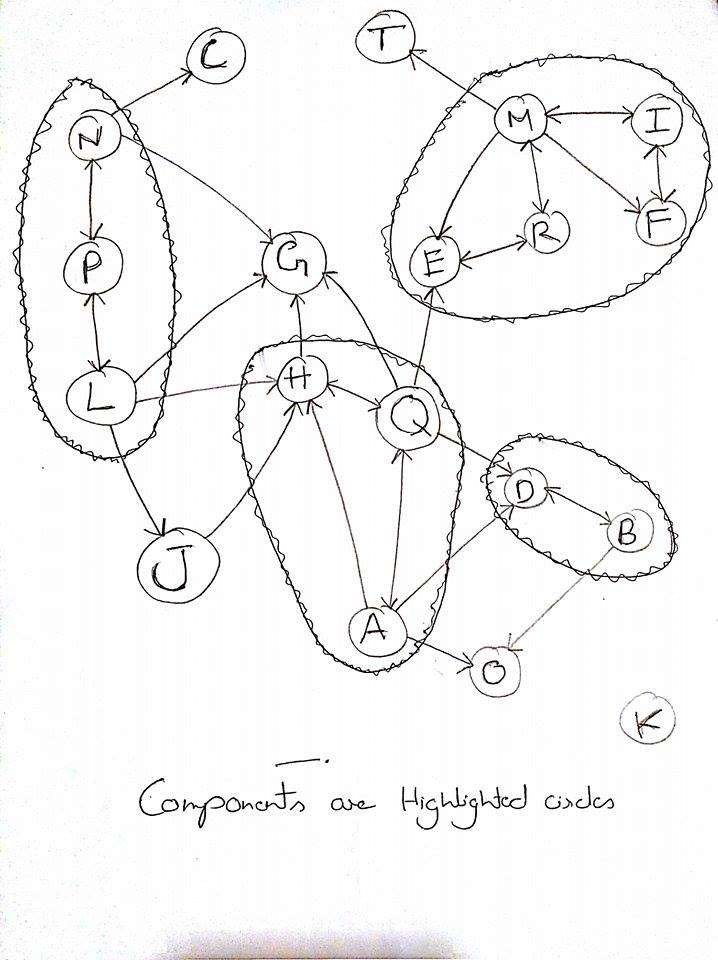

In [4]:
from IPython.display import Image
Image(filename='components.jpg')

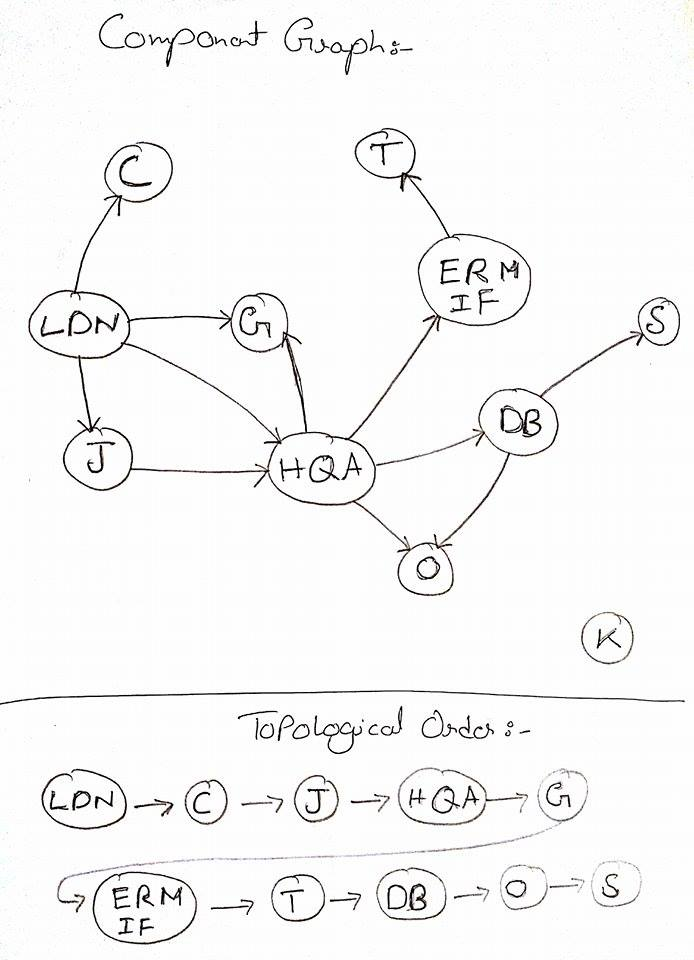

In [5]:
from IPython.display import Image
Image(filename='topological_order.jpg')

### Description:

The Component graph tells us which node or group of nodes are reachable from a node of group of nodes. The idea is to generalize the connections between all nodes to make a topological order.

The topological sort or order is the order of traversing nodes in flow such that in every edge |U.V|, V node cannot be visited before U node.

One of the practical example of topological sorting is installation of packages where packages have dependency on other packages. we consider each package as a node in graph and start installing packages in a topological order.